# Imports/Setup

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

(train_images_original, train_labels), (test_images_original, test_labels) = cifar10.load_data()

In [0]:
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess the data

In [0]:
train_images = train_images_original.reshape((50000, 32, 32, 3)) / 255.0
test_images = test_images_original.reshape((10000, 32, 32, 3)) / 255.0

# **Model 1: Underfit**
**For this model, I only used one convolutional layer and one max pooling layer (with an 8x8 tensor for a 32x32 image) to grossly underfit the model. With this, I achieved about 65% training accuracy and 62% validation accuracy.**

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((8, 8)),
    #
    #keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #keras.layers.MaxPooling2D((2, 2)),
    #
    #keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_147 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 64)                18496     
_________________________________________________________________
dense_109 (Dense)            (None, 10)                650       
Total params: 20,042
Trainable params: 20,042
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the model

In [0]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 8s 155us/sample - loss: 1.6747 - acc: 0.3962 - val_loss: 1.4750 - val_acc: 0.4656
Epoch 2/20
50000/50000 [==============================] - 7s 131us/sample - loss: 1.4221 - acc: 0.4971 - val_loss: 1.3659 - val_acc: 0.5217
Epoch 3/20
50000/50000 [==============================] - 6s 130us/sample - loss: 1.3404 - acc: 0.5291 - val_loss: 1.3313 - val_acc: 0.5290
Epoch 4/20
50000/50000 [==============================] - 6s 129us/sample - loss: 1.2851 - acc: 0.5472 - val_loss: 1.2977 - val_acc: 0.5503
Epoch 5/20
50000/50000 [==============================] - 6s 130us/sample - loss: 1.2434 - acc: 0.5635 - val_loss: 1.2323 - val_acc: 0.5751
Epoch 6/20
50000/50000 [==============================] - 6s 130us/sample - loss: 1.2103 - acc: 0.5745 - val_loss: 1.2068 - val_acc: 0.5762
Epoch 7/20
50000/50000 [==============================] - 7s 131us/sample - loss: 1.1810 - acc: 0.5875 - val_l

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 91us/sample - loss: 1.1058 - acc: 0.6194
Test accuracy: 0.6194


## Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

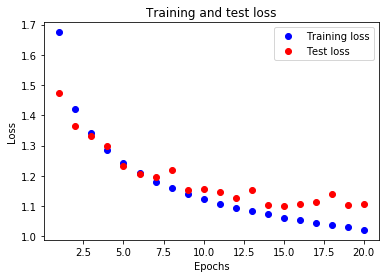

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

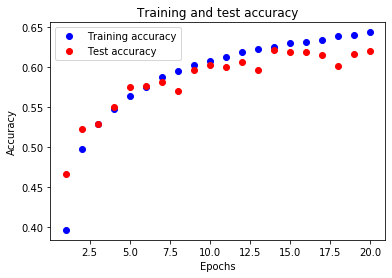

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
train_images = train_images_original.reshape((50000, 32, 32, 3)) / 255.0
test_images = test_images_original.reshape((10000, 32, 32, 3)) / 255.0

# **Model 2: Overfit**
**Since our model is too complex, our model is overfitting to the training accuracy, as shown by the 88% training accuracy and 70% validation accuracy by the 20th epoch, as well as the validation accuracy stagnating after about the 5th epoch.**

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_42 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_110 (Dense)            (None, 64)              

## Compile the model

In [0]:
# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the model

In [0]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 179us/sample - loss: 1.5316 - acc: 0.4443 - val_loss: 1.3220 - val_acc: 0.5210
Epoch 2/20
50000/50000 [==============================] - 8s 152us/sample - loss: 1.1790 - acc: 0.5802 - val_loss: 1.1295 - val_acc: 0.5990
Epoch 3/20
50000/50000 [==============================] - 8s 152us/sample - loss: 1.0178 - acc: 0.6419 - val_loss: 0.9727 - val_acc: 0.6591
Epoch 4/20
50000/50000 [==============================] - 8s 152us/sample - loss: 0.9162 - acc: 0.6779 - val_loss: 0.9658 - val_acc: 0.6625
Epoch 5/20
50000/50000 [==============================] - 8s 152us/sample - loss: 0.8420 - acc: 0.7042 - val_loss: 0.8919 - val_acc: 0.6834
Epoch 6/20
50000/50000 [==============================] - 8s 152us/sample - loss: 0.7852 - acc: 0.7237 - val_loss: 0.8988 - val_acc: 0.6857
Epoch 7/20
50000/50000 [==============================] - 8s 152us/sample - loss: 0.7443 - acc: 0.7406 - val_l

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 97us/sample - loss: 1.1394 - acc: 0.6897
Test accuracy: 0.6897


## Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

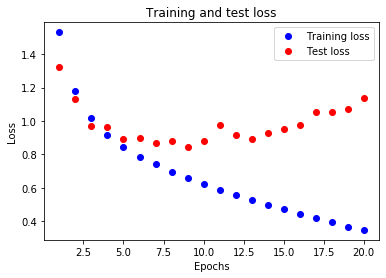

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

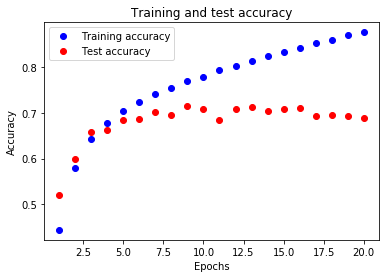

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Model 3: Decently fitted**
**I experimented with epochs, number of layers, filter dimension, etc. but the best validation accuracy I achieved with a decently fit model was about 75%.**

## Build the model

In [0]:
# set up the layers

model3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Conv2D(64, (5, 5), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #
    #.layers.Conv2D(128, (3, 3), activation='relu'),
    #keras.layers.MaxPooling2D((1, 1)),
    #
    #keras.layers.Conv2D(256, (3, 3), activation='relu'),
    #keras.layers.MaxPooling2D((2, 2)),
    #
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    #keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    #keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model3.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_151 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 1024)            

## Compile the model

In [0]:
# compile the model

model3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train the model

In [0]:
# train the model
epochs = 12
history = model3.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 10s 209us/sample - loss: 1.5316 - acc: 0.4392 - val_loss: 1.2363 - val_acc: 0.5481
Epoch 2/12
50000/50000 [==============================] - 9s 180us/sample - loss: 1.1618 - acc: 0.5823 - val_loss: 1.0081 - val_acc: 0.6396
Epoch 3/12
50000/50000 [==============================] - 9s 184us/sample - loss: 1.0191 - acc: 0.6357 - val_loss: 0.9314 - val_acc: 0.6689
Epoch 4/12
50000/50000 [==============================] - 9s 182us/sample - loss: 0.9229 - acc: 0.6712 - val_loss: 0.9241 - val_acc: 0.6749
Epoch 5/12
50000/50000 [==============================] - 9s 180us/sample - loss: 0.8644 - acc: 0.6918 - val_loss: 0.8871 - val_acc: 0.6922
Epoch 6/12
50000/50000 [==============================] - 9s 180us/sample - loss: 0.8106 - acc: 0.7142 - val_loss: 0.8260 - val_acc: 0.7157
Epoch 7/12
50000/50000 [==============================] - 9s 181us/sample - loss: 0.7685 - acc: 0.7263 - val_

## Evaluate accuracy

In [0]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 102us/sample - loss: 0.7374 - acc: 0.7503
Test accuracy: 0.7503


## Training/Test Loss/Accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

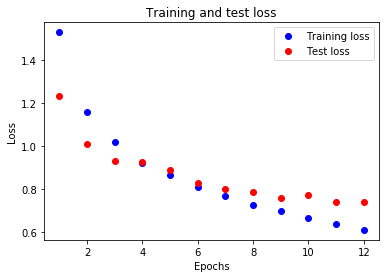

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

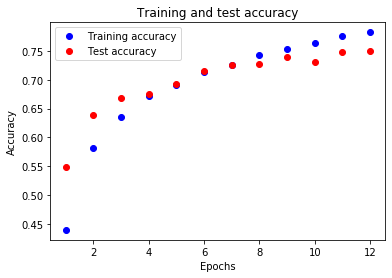

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()